In [ ]:
# LOGISTIC REGRESSION CLASSIFIER AS A PERCEPTRON NEURAL NETWORK
# Computational Graph :
# any opt fn that we want to maximize or minimize can be expressed in terms of a graph
# plotting cost fn as a graph
# loss fn computation can be expressed as a graph
# this is the basis of tensorflow 
# tensorflow implements neural networks as a graph
# if we compute fwd in this graph i.e. lt to rt then we compute the value of the fn
# if we move bwd i.e. rt to lt in this graph then we can calc gradient of the cost fn wrt to various params

# Logistic Regression can be considered as a single layer neural network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_path1='/content/drive/MyDrive/Log/Train/Planes/'
train_path2='/content/drive/MyDrive/Log/Train/Bikes/'
test_path1='/content/drive/MyDrive/Log/Test/Planes/'
test_path2='/content/drive/MyDrive/Log/Test/Bikes/'

In [10]:
import numpy as np

In [17]:
# features x examples
# if image size is 64x64 and 3 channels or filters the flattened image vector is of size 1x12288
# train size is 12288 features x 1500 train examples
train_x=np.zeros((12288,1500))
train_y=np.zeros((1,1500))
test_x=np.zeros((12288,96))
test_y=np.zeros((1,96))

In [18]:
import os
from keras.preprocessing import image
train_files1=os.listdir(train_path1)
train_files2=os.listdir(train_path2)
for i in range(len(train_files1)):
  img=image.load_img(train_path1+train_files1[i],target_size=(64,64))
  arr=np.array(img)
  arr=arr.flatten()
  train_x[:,i]=arr
  train_y[0,i]=0
for i in range(len(train_files2)):
  img=image.load_img(train_path2+train_files2[i],target_size=(64,64))
  arr=np.array(img)
  arr=arr.flatten()
  train_x[:,i+750]=arr
  train_y[0,i+750]=1

In [19]:
test_files1=os.listdir(test_path1)
test_files2=os.listdir(test_path2)
for i in range(len(test_files1)):
  img=image.load_img(test_path1+test_files1[i],target_size=(64,64))
  arr=np.array(img)
  arr=arr.flatten()
  test_x[:,i]=arr
  test_y[0,i]=0
for i in range(len(test_files2)):
  img=image.load_img(test_path2+test_files2[i],target_size=(64,64))
  arr=np.array(img)
  arr=arr.flatten()
  test_x[:,i+48]=arr
  test_y[0,i+48]=1

In [20]:
# Normalizing pixel values
train_x=train_x/255.0
test_x=test_x/255.0

In [21]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [22]:
def init_params(dimension):
  w=np.zeros((dimension,1))
  b=0
  return w,b


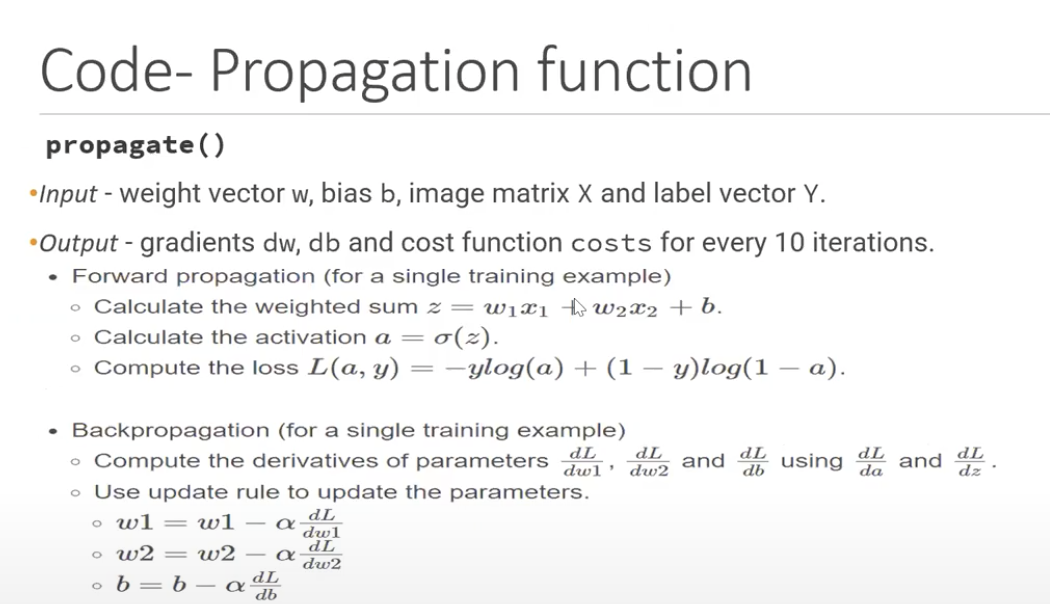

In fwd pass, we calc the predicted value and the loss or cost function
In bwd pass, we compute the gradients of loss function wrt weights and bias

In [33]:
def propagate(w,b,X,Y):
  n=X.shape[1]
  #fwd pass
  predicted=sigmoid(np.dot(w.T,X)+b)
  cost=(-1/n)*np.sum(np.multiply(Y,np.log(predicted))+np.multiply((1-Y),np.log(1-predicted)))
  #bwd pass
  dw=(1/n)*np.dot(X,(predicted-Y).T)
  db=(1/n)*np.sum(predicted-Y)
  grads={'dw':dw,'db':db}
  cost=np.squeeze(cost) #return cost as 1D array

  return grads,cost

In [34]:
def train(w,b,X,Y,epochs,lr):
  costs=[]
  for i in range(epochs):
    grads,cost=propagate(w,b,X,Y)

    dw=grads['dw']
    db=grads['db']

    w=w-(lr*dw)
    b=b-(lr*db)

    if(i%10==0):
      costs.append(cost)
      print(f'cost after {i} iterations : {cost}\n')
  params={'w':w,'b':b}
  return params,costs

In [35]:
def predict(w,b,X):
  A=sigmoid(np.dot(w.T,X)+b)
  Y_predict=np.zeros((1,X.shape[1]))
  for i in range(len(A)):
    if (A[0,i]>0.5):
      Y_predict[0,i]=1
  return Y_predict

In [40]:
def model(X_train,Y_train,X_test,Y_test,epochs,lr):
  w,b=init_params(X_train.shape[0])
  params,cost=train(w,b,X_train,Y_train,epochs,lr)
  w=params['w']
  b=params['b']
  Y_test_pred=predict(w,b,X_test)
  print(f"test_accuracy:{100-np.mean(np.abs(Y_test_pred-Y_test))*100}%")

In [41]:
model(train_x,train_y,test_x,test_y,100,0.0001)

cost after 0 iterations : 0.6931471805599453

cost after 10 iterations : 0.6676732657581099

cost after 20 iterations : 0.6510649615118917

cost after 30 iterations : 0.6358620326489279

cost after 40 iterations : 0.6214783012254826

cost after 50 iterations : 0.6078281531104435

cost after 60 iterations : 0.5948653214754006

cost after 70 iterations : 0.5825485160552983

cost after 80 iterations : 0.5708388633594704

cost after 90 iterations : 0.5596997051484448

test_accuracy:48.958333333333336%


In [42]:
# accuracy is low because this is a single layer neural network
# we require more training data to train the neural network properly

In [ ]:
# as the data increases for better performance use neural network with more layers